In [10]:

"""
    Gets utilities to work with
"""
import random
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np


def timeit(func, *args):
    start = datetime.now()
    func(*args)
    end = datetime.now()
    return (end - start).microseconds / 1000

# def timeit(func, *args):
#     start = time.time()
#     func(*args)
#     end = time.time()
#     return (end - start) * 1000


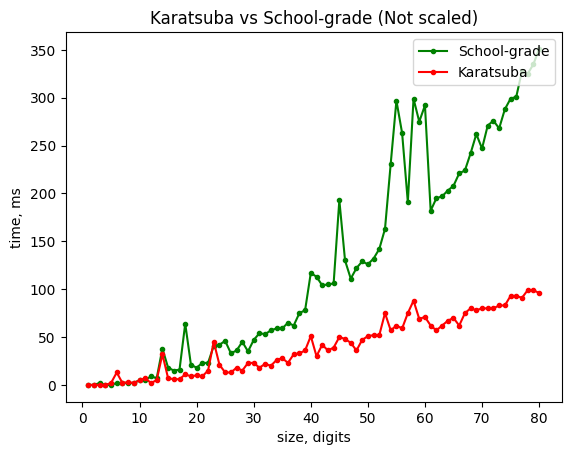

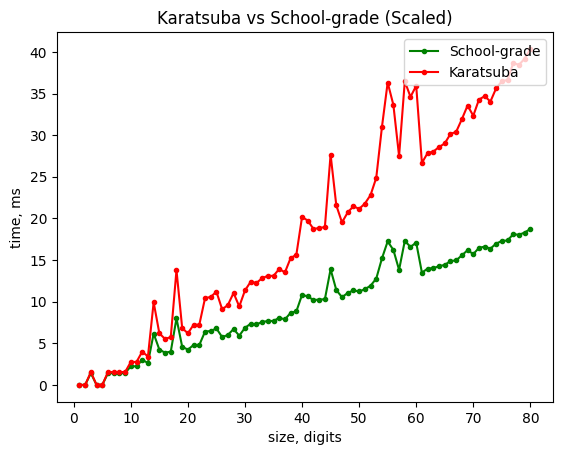

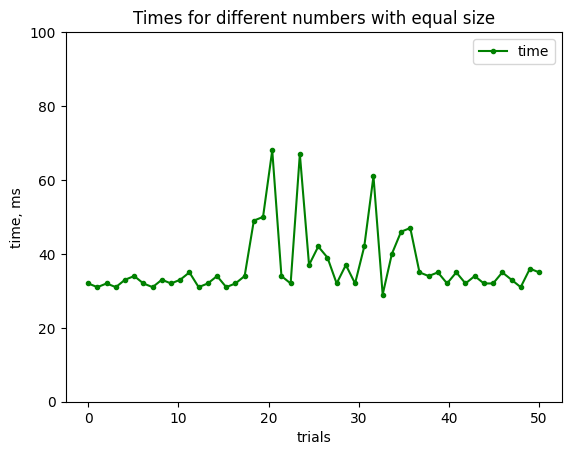

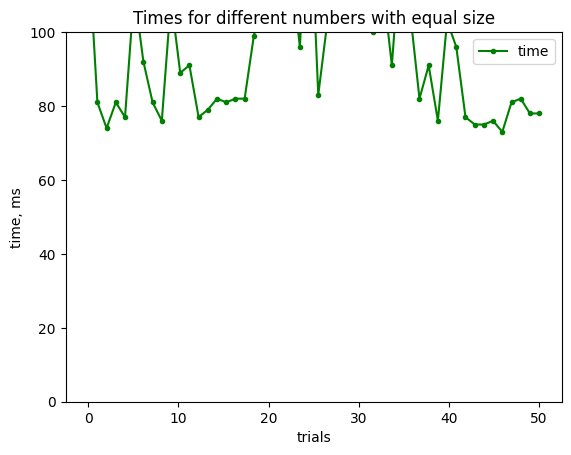

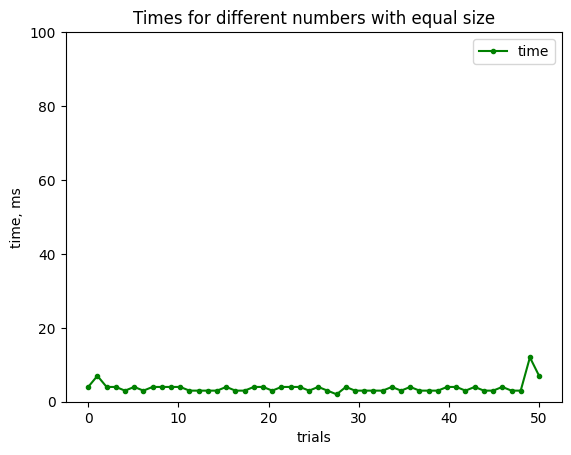

In [11]:
"""
    School Multiplication vs Karatsuba
"""
from math import sqrt, log


# 1.1
def make_same_len(num1: str, num2: str):
    """
    Makes num1 and num2 of the same length.
    :param num1: str
    :param num2: str
    :return: str, str
    """
    if len(num1) < len(num2):
        num1 = '0' * (len(num2) - len(num1)) + num1
    else:
        num2 = '0' * (len(num1) - len(num2)) + num2
    return num1, num2


def add(num1: str, num2: str):
    """
    Adds up two integers in binary forms, represented as strings.
    :param num1: str
    :param num2: str
    :return: str
    """
    if len(num1) != len(num2):
        num1, num2 = make_same_len(num1, num2)
    result = ""
    next_plus = 0
    for i in range(len(num1)):
        bit1 = int(num1[len(num1) - i - 1])
        bit2 = int(num2[len(num1) - i - 1])
        val = (bit1 ^ bit2) ^ next_plus
        result = str(val) + result
        next_plus = (bit1 & bit2) | (bit1 & next_plus) | (bit2 & next_plus)
    if next_plus:
        result = '1' + result
    return result


def school_mult(num1: int, num2: int):
    """
    Multiplies two numbers using school-grade algorithm
    :param num1: int
    :param num2: int
    :return: str
    """
    num1, num2 = bin(num1)[2:], bin(num2)[2:]
    res = ""
    for idx1 in range(len(num1) - 1, -1, -1):
        term = ""
        for idx2 in range(len(num2)):
            term = str(int(num1[len(num1) - idx1 - 1]) * int(num2[len(num2) - idx2 - 1])) + term
        term = term + '0' * idx1
        res = add(*make_same_len(res, term))
    return res


# 1.2
def karatsuba_mult(num1: str, num2: str):
    """
    Multiplies two numbers using Karatsuba algorithm.
    :param num1: str
    :param num2: str
    :return: str
    """
    num1, num2 = make_same_len(num1, num2)
    length = len(num1)

    if length == 0:
        return 0
    if length == 1:
        return int(num1) & int(num2)

    left1 = num1[:length // 2]
    right1 = num1[length // 2:]
    left2 = num2[:length // 2]
    right2 = num2[length // 2:]

    prod1 = karatsuba_mult(left1, left2)
    prod2 = karatsuba_mult(right1, right2)
    prod3 = karatsuba_mult(add(left1, right1), add(left2, right2))
    # TODO: IS THIS WORKING???
    return prod1 * (1 << 2 * (length - length // 2)) + (1 << (length - length // 2)) * (prod3 - prod1 - prod2) + prod2


# 1.3
# a) Grade-school multiplication algorithm's complexity is O(n^2),
# where n is the largest of length of two numbers in binary
# representation. That is because when you multiply an n-digit number
# by an m-digit number using it, you end up with a sum of m shifted
# copies of the n digit number which you then have to add up.
# Naive explanation: One by one take all bits of second number (O(m)) and
# multiply it with all bits of first number (O(n)), which results in:
# O(m) * O(n) = O(mn) = O(n^2), where n >= m.

# b) The complexity of Karatsuba algorithm is O(n^log2(3)) because we
# divide our task into 3 subproblems, each of size n / 2 and then sum
# all the terms up. Thus, the recurrence relation is:
# T(n) = 3*T(n/2) + O(n) = (*)
# By using Master Theorem (case 1), it can be easily shown that:
# (*) = O(n^log2(3)).

# 1.4
dig_num = 80
exp_count = 6
times1 = [0] * dig_num
times2 = [0] * dig_num
numbers = list(range(1, dig_num + 1))


def get_measurements():
    for idx, number_size in enumerate(numbers):
        tmp_time1 = 0
        tmp_time2 = 0
        for exp in range(exp_count):
            number_size = int(number_size)
            n1, n2 = random.randint(10 ** (number_size - 1), 10 ** number_size), random.randint(10 ** (number_size - 1),
                                                                                                10 ** number_size)
            num_str1, num_str2 = bin(n1)[2:], bin(n2)[2:]
            tmp_time1 += timeit(school_mult, n1, n2)
            tmp_time2 += timeit(karatsuba_mult, num_str1, num_str2)
        times1[idx] = tmp_time1 // exp_count
        times2[idx] = tmp_time2 // exp_count


get_measurements()


def plot_not_scaled():
    plt.xlabel('size, digits')
    plt.ylabel('time, ms')
    plt.title("Karatsuba vs School-grade (Not scaled)")
    plt.plot(numbers, times1, '.-g', label="School-grade")
    plt.plot(numbers, times2, '.-r', label='Karatsuba')
    plt.legend(loc='upper right')
    plt.show()


def plot_scaled():
    plt.xlabel('size, digits')
    plt.ylabel('time, ms')
    plt.title("Karatsuba vs School-grade (Scaled)")
    t1 = [sqrt(elem) for elem in times1]
    t2 = [elem ** log(2, 3) for elem in times1]
    plt.plot(numbers, t1, '.-g', label="School-grade")
    plt.plot(numbers, t2, '.-r', label='Karatsuba')
    plt.legend(loc='upper right')
    plt.show()


plot_not_scaled()
plot_scaled()


# As you can see from graphs, our hypotheses are true.

# 1.5
# No, the execution time does not depend on actual values, it differs
# only for numbers without equal digit number.
# Example below shows that:
def check_dependency_of_values(size: int, cnt=50):
    t = [0] * cnt
    for i in range(cnt):
        average = 0
        for j in range(10):
            size = int(size)
            num1, num2 = random.randint(10 ** (size - 1), 10 ** size), random.randint(10 ** (size - 1),
                                                                                      10 ** size)
            average += timeit(karatsuba_mult, bin(num1)[2:], bin(num2)[2:])
        t[i] = average // 10

    plt.xlabel('trials')
    plt.ylabel('time, ms')
    plt.title("Times for different numbers with equal size")
    plt.plot(np.linspace(0, 50, 50), t, '.-g', label='time')
    ax = plt.gca()
    ax.set_ylim([0, 100])
    plt.legend(loc='upper right')
    plt.show()


check_dependency_of_values(40)
check_dependency_of_values(70)
check_dependency_of_values(10)

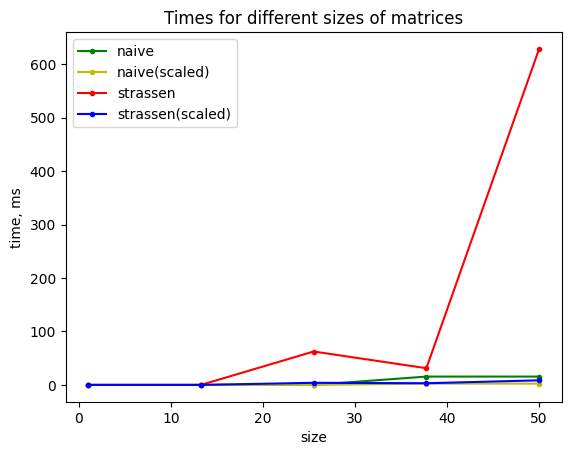

In [14]:
"""
Matrices multiplication
"""
from math import log2
from typing import List

import numpy as np


def dot_product(arr1: List, arr2: List) -> float:
    """
    Receives a dot product.
    :param arr1: a list of numbers
    :param arr2: a list of numbers
    :return: float - a dot product
    """
    assert len(arr1) == len(arr2)
    result = 0
    for idx in range(len(arr1)):
        result += arr1[idx] * arr2[idx]
    return result


# 1
def naive_matrix_mult(matrix1: List[List], matrix2: List[List]):
    assert len(matrix1) == len(matrix2[0])
    matrix = [[0 for i in range(len(matrix1))] for j in range(len(matrix1))]
    for idx1, arr1 in enumerate(matrix1):
        for idx2 in range(len(matrix2[0])):
            matrix[idx1][idx2] = dot_product(arr1, [item[idx2] for item in matrix2])
    return matrix


# 2

def add_matrices(matrix1: List[List], matrix2: List[List]):
    matrix = [[0 for i in range(len(matrix1[0]))] for j in range(len(matrix1))]
    for idx1 in range(len(matrix)):
        for idx2 in range(len(matrix[0])):
            matrix[idx1][idx2] = matrix1[idx1][idx2] + matrix2[idx1][idx2]
    return matrix


def subtract_matrices(matrix1: List[List], matrix2: List[List]):
    matrix = [[0 for i in range(len(matrix1[0]))] for j in range(len(matrix1))]
    for idx1 in range(len(matrix)):
        for idx2 in range(len(matrix[0])):
            matrix[idx1][idx2] = matrix1[idx1][idx2] - matrix2[idx1][idx2]
    return matrix


def format_matrices(matrix1: List[List], matrix2: List[List]):
    new_len = log2(max(len(matrix1), len(matrix1[0]), len(matrix2), len(matrix2[0])))
    if new_len == int(new_len):
        new_len = 2 ** int(new_len)
    else:
        new_len = 2 ** (int(new_len) + 1)
    new_matrix1, new_matrix2 = [[0 for i in range(new_len)] for j in range(new_len)], [[0 for i in range(new_len)] for j
                                                                                       in range(new_len)]
    for idx1 in range(len(matrix1)):
        for idx2 in range(len(matrix1[0])):
            new_matrix1[idx1][idx2] = matrix1[idx1][idx2]

    for idx1 in range(len(matrix2)):
        for idx2 in range(len(matrix2[0])):
            new_matrix2[idx1][idx2] = matrix2[idx1][idx2]

    return new_matrix1, new_matrix2


def split(matrix: List[List]):
    length = len(matrix)
    half_len = length // 2
    m1, m2, m3, m4 = [], [], [], []
    for i in range(half_len):
        m1.append(matrix[i][:half_len])
        m2.append(matrix[i][half_len:])
        m3.append(matrix[i + half_len][:half_len])
        m4.append(matrix[i + half_len][half_len:])
    return m1, m2, m3, m4


def strassen(matrix1: List[List], matrix2: List[List]):
    if len(matrix1) <= 2:
        return naive_matrix_mult(matrix1, matrix2)

    matrix1, matrix2 = format_matrices(matrix1, matrix2)
    a, b, c, d = split(matrix1)
    e, f, g, h = split(matrix2)
    print(a, b, c, d, e, f, g, h)

    p1 = strassen(add_matrices(a, d), add_matrices(e, h))
    p2 = strassen(d, subtract_matrices(g, e))
    p3 = strassen(add_matrices(a, b), h)
    p4 = strassen(subtract_matrices(b, d), add_matrices(g, h))
    p5 = strassen(a, subtract_matrices(f, h))
    p6 = strassen(add_matrices(c, d), e)
    p7 = strassen(subtract_matrices(a, c), add_matrices(e, f))

    C11 = add_matrices(subtract_matrices(add_matrices(p1, p2), p3), p4)
    C12 = add_matrices(p5, p3)
    C21 = add_matrices(p6, p2)
    C22 = subtract_matrices(subtract_matrices(add_matrices(p5, p1), p6), p7)
    C = np.vstack((np.hstack((C11, C12)).tolist(), np.hstack((C21, C22)).tolist())).tolist()
    return C

# 3.1
# If you multiply two n x n matrices to produce a third n x n matrix, then every element
# of the output matrix is the result of a dot product. Each dot product takes O(n) time,
# and you need to do n^2 of them, so the entire matrix multiplication takes O(n^3) time.

# 3.2
# That is because we have T(n) = 7*T(n/2) + O(n^2), which results, by Master theorem (case 1),
# into T(n) = O(n ^ log(7)).

# 4.1

def plot_matrix_dep(max_size:int):
    times_naive = []
    times_strassen = []
    for size in range(1, max_size, 10):
        matrix = []
        for i in range(size):
            row = []
            for j in range(size):
                row.append(random.randint(0, 10**4))
            matrix.append(row)
        times_naive.append(timeit(naive_matrix_mult, matrix, matrix))
        times_strassen.append(timeit(strassen, matrix, matrix))
    plt.xlabel('size')
    plt.ylabel('time, ms')
    plt.title("Times for different sizes of matrices")
    plt.plot(np.linspace(1, max_size, max_size // 10), times_naive, '.-g', label='naive')
    plt.plot(np.linspace(1, max_size, max_size // 10), [elem ** (1 / 3) for elem in times_naive], '.-y', label='naive(scaled)')
    plt.plot(np.linspace(1, max_size, max_size // 10), times_strassen, '.-r', label='strassen')
    plt.plot(np.linspace(1, max_size, max_size // 10), [elem ** (1 / 3) for elem in times_strassen], '.-b', label='strassen(scaled)')
    plt.legend(loc='best')
    plt.show()

plot_matrix_dep(100)

Randomized Algorithms

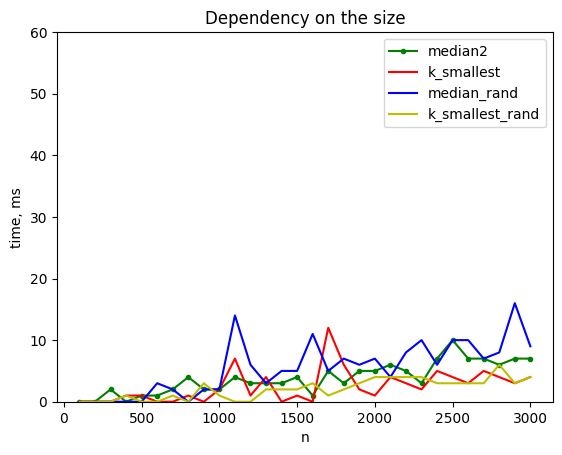

In [13]:
"""
Las Vegas: Median and K-smaller integer
"""
import bisect


# 1.a
def max_min(seq: list):
    """
    Returns a pair or max and min element in array.
    :param seq: list
    :return: (Any, Any)
    """
    assert len(seq) > 0

    max_elem = seq[0]
    min_elem = seq[0]

    for _, elem in enumerate(seq):
        if max_elem < elem:
            max_elem = elem
        if min_elem > elem:
            min_elem = elem

    return min_elem, max_elem


# 1.c
def k_smallest(seq: list, k: int):
    """
    Finds the k-smallest element in sequence.
    Uses quick-sort paradigm (median of medians)
    :param seq: list
    :param k: int
    :return: Any
    """
    lists_of_5 = [seq[idx:idx + 5] for idx in range(0, len(seq), 5)]
    medians = [sorted(lst)[len(lst) // 2] for lst in lists_of_5]
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians) // 2]
    else:
        pivot = k_smallest_rand(medians, len(medians) // 2)

    left = [idx for idx in seq if idx < pivot]
    right = [elem for elem in seq if elem >= pivot]

    # Special case
    right.remove(pivot)
    if len(left) == 0 or len(right) == 0:
        return pivot
    if k < len(left):
        return k_smallest_rand(left, k)
    elif k > len(left):
        return k_smallest_rand(right, k - len(left) - 1)
    return pivot


# 1.b
def median(seq: list):
    if len(seq) % 2 == 1:
        return k_smallest(seq, len(seq) // 2)
    return (k_smallest(seq, len(seq) // 2 - 1) + k_smallest(seq, len(seq) // 2)) / 2


# 2.b
def k_smallest_rand(seq: list, k: int):
    """
    Finds the k-smallest element in sequence.
    Uses quick-sort paradigm, but with random pivot.
    :param seq: list
    :param k: int
    :return: Any
    """
    lists_of_5 = [seq[idx:idx + 5] for idx in range(0, len(seq), 5)]
    medians = [sorted(lst)[len(lst) // 2] for lst in lists_of_5]
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians) // 2]
    else:
        pivot = k_smallest_rand(medians, random.randint(0, len(medians)))

    left = [elem for elem in seq if elem < pivot]
    right = [elem for elem in seq if elem >= pivot]

    # Special case
    right.remove(pivot)
    if len(left) == 0 or len(right) == 0:
        return pivot

    if k < len(left):
        return k_smallest_rand(left, k)
    elif k > len(left):
        return k_smallest_rand(right, k - len(left) - 1)
    return pivot


# 2.a
def median_rand(seq: list):
    if len(seq) % 2 == 1:
        return k_smallest_rand(seq, len(seq) // 2)
    return (k_smallest_rand(seq, len(seq) // 2 - 1) + k_smallest_rand(seq, len(seq) // 2)) / 2


# 2.5
def plot_dep_n(bound: int, step=100, rng=10 ** 4, exp=20):
    arr = []
    arr_sorted = []
    times_med = []
    times_med_s = []
    times_med_i = []
    times_k = []
    times_k_s = []
    times_k_i = []
    times_med_r = []
    times_med_r_s = []
    times_med_r_i = []
    times_k_r = []
    times_k_r_s = []
    times_k_r_i = []

    for n in range(0, bound, step):
        to_add = random.sample(range(0, rng), step)
        arr.extend(to_add)
        for elem in to_add:
            bisect.insort(arr_sorted, elem)
        k = random.randint(0, len(arr))
        tmed, tk, tmedr, tkr = 0, 0, 0, 0
        for _ in range(exp):
            tmed += timeit(median, arr)
            tk += timeit(k_smallest, arr, k)
            tmedr += timeit(median_rand, arr)
            tkr += timeit(k_smallest_rand, arr, k)

        times_med.append(tmed // exp)
        times_k.append(tk // exp)
        times_med_r.append(tmedr // exp)
        times_k_r.append(tkr // exp)

    steps = [step * i for i in range(1, bound // step + 1)]
    plt.xlabel('n')
    plt.ylabel('time, ms')
    plt.title("Dependency on the size")
    plt.plot(steps, times_med, '.-g', label='median2')
    plt.plot(steps, times_k, 'r', label='k_smallest')
    plt.plot(steps, times_med_r, 'b', label='median_rand')
    plt.plot(steps, times_k_r, 'y', label='k_smallest_rand')
    ax = plt.gca()
    ax.set_ylim([0, bound // 50])
    plt.legend(loc='best')
    plt.show()


plot_dep_n(3000, 100)